This tutorial shows how to use STA/LTA method including classical and recursive STA/LTA for phase pikcing.

In [1]:
#import sys
#sys.path.insert(0, '..')
from saipy.utils.packagetools import classic_picking
from saipy.data.realdata import *

### $(\mathrm{i})$ Benchmark dataset picking including STEAD and INSTANCE

### STEAD dataset

In [2]:
%load_ext autoreload
%autoreload 2
from saipy.data.base import STEAD
from saipy.utils.picktools import *
stead = STEAD('/home/seismoai/data')
metadata,waveform = stead.get_dynapicker_data()

## here you can manually choose differen trace
df = metadata[(metadata.trace_category == 'earthquake_local')]
ev_list = df['trace_name'].to_list()[10:11]
evi = ev_list[0]
dataset = waveform.get('data/'+str(evi)) 
trace = make_stream_stead(dataset)[2]     

109C.TA_20070117160753_EV


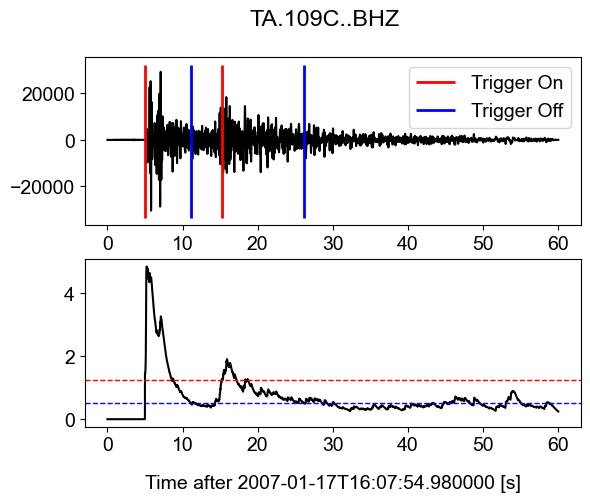

array([0.        , 0.        , 0.        , ..., 0.24754   , 0.24555571,
       0.24358733])

In [3]:
print(dataset.attrs['trace_name'])
classic_picking(trigger_type = 'recursive_sta_lta', trace = trace, nsta=1, nlta=5, 
                thr_on=1.25, thr_off=0.5, plotFlag=True)

### INSTANCE dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


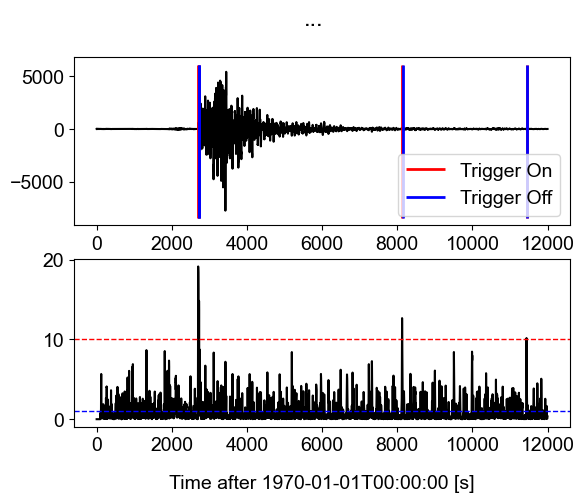

array([0.        , 0.        , 0.        , ..., 0.26072787, 0.30352304,
       0.34915439])

In [4]:
%load_ext autoreload
%autoreload 2
from saipy.data.base import INSTANCE
from saipy.utils.picktools import *
from obspy.core.trace import Trace

instance = INSTANCE('/home/seismoai/data')
df,waveform = instance.get_dynapicker_data()

## here you can manually choose differen trace

evi = df['trace_name'].to_list()[100]
dataset = waveform.get('data/'+str(evi)) 
# trace = make_stream_stead(dataset)[2]
trace = Trace(dataset[2]) 
classic_picking(trigger_type = 'classic_sta_lta', 
                 trace = trace, nsta=5, nlta=100, 
                 thr_on=10, thr_off=1, plotFlag=True)
    

### $(\mathrm{ii})$ Downloaded data

In [5]:
t1 = UTCDateTime("2021-07-31T21:05:00")
wsp = 'IRIS'
net =  'AE'
sta =  '319A'
loc = '*'
chan = "*"
start_time = t1
end_time = t1 + 60*60

st = waveform_download(wsp, net,sta,loc,chan,start_time, end_time)

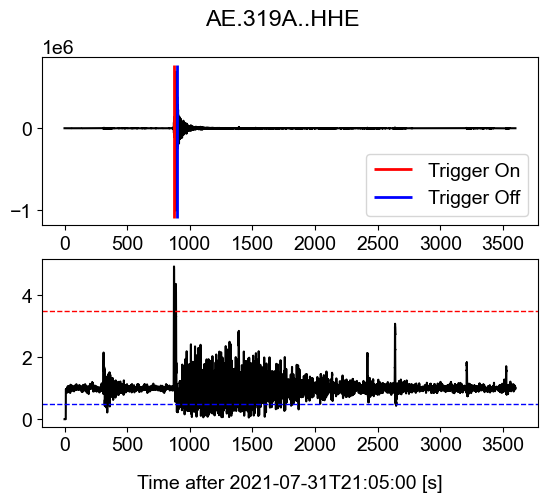

array([0.        , 0.        , 0.        , ..., 1.00188975, 1.00087429,
       0.99951557])

In [6]:
classic_picking(trigger_type='classic_sta_lta', trace =st[0], 
                 nsta=2, nlta=10, thr_on=3.5, thr_off=0.5, 
                 plotFlag=True)

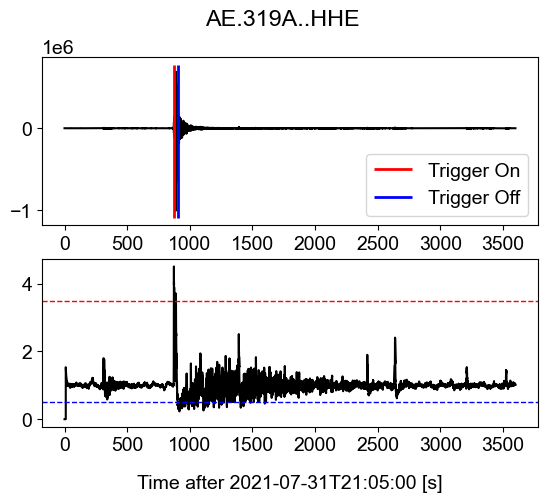

array([0.        , 0.        , 0.        , ..., 1.01257518, 1.01192393,
       1.01121277])

In [9]:
classic_picking(trigger_type='recursive_sta_lta', trace =st[0], 
                 nsta=2, nlta=10, thr_on=3.5, thr_off=0.5, 
                 plotFlag=True)